예제 8.1 잡음 제거 스택 오토 인코더

In [ ]:
# 예제 8.1 스택 오토 인코더(잡음 제거)

#셋업
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 데이터셋 준비
(x_train, _), (x_test, _) = mnist.load_data()   # 레이블은 사용하지 않음

# 데이터 정규화
x_train = x_train / 255.
x_test = x_test / 255.

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# 2차원 이미지를 1차원 벡터로 변환
x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test.reshape(x_test.shape[0], 28 * 28)

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
# 잡음 추가(평균 0/표준편차 0.5)/잡음 추가한 결과 조정(0 ~ 1)
noise = np.random.normal(loc=0, scale=0.5, size=x_train.shape)
x_train_noise = x_train + noise

noise = np.random.normal(loc=0, scale=0.5, size=x_test.shape)
x_test_noise = x_test + noise

x_train_noise = np.clip(x_train_noise, a_min=0, a_max=1)
x_test_noise = np.clip(x_test_noise, a_min=0, a_max=1)

In [ ]:
# 인코더 정의
class Encoder(Model):
    def __init__(self, latent_dim):
        super(Encoder, self).__init__()
        self.dense1 = Dense(units=latent_dim * 2, activation='ReLU')
        self.dense2 = Dense(units=latent_dim, activation='ReLU')

    def call(self, x):
        x = self.dense1(x)
        x = self.dense2(x)
        return x

In [ ]:
# 디코더 정의
class Decoder(Model):
    def __init__(self, latent_dim):
        super(Decoder, self).__init__()
        self.dense1 = Dense(units=latent_dim * 2, activation='ReLU')
        self.dense2 = Dense(units=28 * 28, activation='sigmoid')

    def call(self, x):
        x = self.dense1(x)
        x = self.dense2(x)
        return x

In [ ]:
# 스택 오토 인코더 정의
class StackAutoEncoder(Model):
    def __init__(self, latent_dim):
        super(StackAutoEncoder, self).__init__()
        #self.loss = []
        self.encoder = Encoder(latent_dim)
        self.decoder = Decoder(latent_dim)

    def call(self, inputs):
        x = self.encoder(inputs)
        x = self.decoder(x)
        return x

# 모델 생성
model = StackAutoEncoder(latent_dim=32)

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss='mse')

In [ ]:
# 모델 학습
history = model.fit(x_train_noise, x_train, batch_size=32, epochs=10,
                    verbose=0)

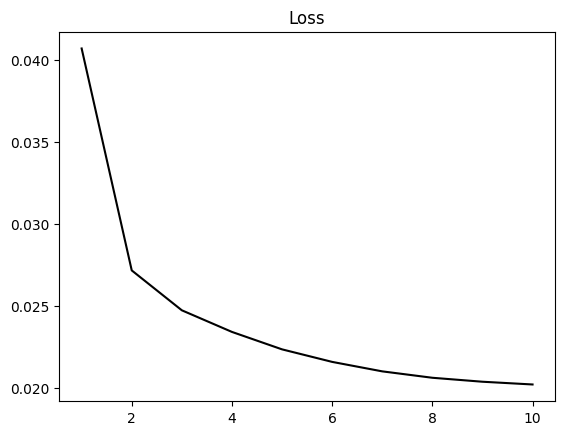

In [ ]:
# 학습 결과 시각화
plt.plot(range(1, len(history.history['loss']) + 1),
         history.history['loss'], color='black')
plt.title('Loss')

plt.show()

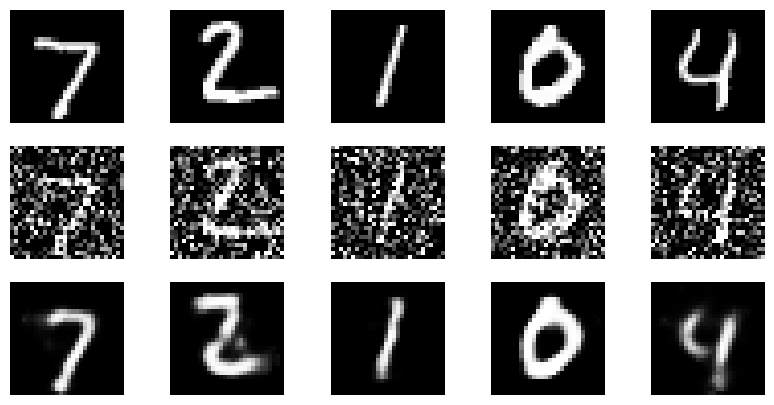

In [ ]:
# 원본 이미지/잡음 추가 이미지/재구성 이미지 시각화
plt.figure(figsize=(10, 5))

for i in range(5):

    # 원본 이미지
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # 잡음 추가 이미지
    ax = plt.subplot(3, 5, i + 1 + 5)
    plt.imshow(x_test_noise[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # 재구성 이미지
    ax = plt.subplot(3, 5, i + 1 + 10)
    plt.imshow(model(x_test)[i].numpy().reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()